In [117]:
import numpy as np
import pandas as po
import matplotlib.pyplot as plt
from tslearn.metrics import lb_keogh
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
df = po.read_csv('../data/energy_daily.csv')

In [3]:
df.head()

,Date,W
0,2017-01-02,113884.376756
1,2017-01-03,115749.403766
2,2017-01-04,114738.968744
3,2017-01-05,113232.581490
4,2017-01-06,108208.275373


In [4]:
df['Date'] = po.to_datetime(df['Date'])
df = df.set_index('Date')

In [5]:
df_17 = df[:'2017-12-31']

In [6]:
df_17.tail()

,W
Date,
2017-12-28,104547.885597
2017-12-29,109745.609984
2017-12-30,90751.220376
2017-12-31,87303.281802
2017-12-31,77824.756671


In [7]:
df_17 = df_17[:-1]
df_17.tail()

,W
Date,
2017-12-27,104289.866191
2017-12-28,104547.885597
2017-12-29,109745.609984
2017-12-30,90751.220376
2017-12-31,87303.281802


In [8]:
df_17['Month'] = df_17.index.month

In [9]:
df_dates = po.DataFrame(po.date_range(start='2017-01-01', end='2017-12-31', freq='D'))
df_dates['Date'] = df_dates[df_dates.columns[0]]

In [10]:
df_dates = df_dates.set_index('Date')

In [11]:
df_dates.head()

,0
Date,
2017-01-01,2017-01-01
2017-01-02,2017-01-02
2017-01-03,2017-01-03
2017-01-04,2017-01-04
2017-01-05,2017-01-05


In [12]:
df_17 = po.concat([df_17, df_dates], axis=1)

In [13]:
df_17 = df_17.interpolate(method='linear')

In [14]:
df_17.isnull().sum()

W        1
Month    1
0        0
dtype: int64

In [15]:
df_17 = df_17.fillna(method='bfill')

In [16]:
df_17.isnull().sum()

W        0
Month    0
0        0
dtype: int64

In [17]:
df_17 = df_17.drop(0, axis = 1)

In [18]:
gb_month = df_17.groupby('Month')
months = df_17['Month'].unique()

In [21]:
m_list = []
for m in months:
    df_m = gb_month.get_group(m)
    m_list.append(df_m['W'].values[:28])

In [30]:
m_arr = np.array(m_list)
m_arr.shape

(12, 28)

In [26]:
lb_keogh(m_list[0], m_list[1])

98036.63863826744

In [112]:
model = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=3)

In [113]:
dist_mat = []
for i in m_arr:
    m_dist = []
    for j in m_arr:
        m_dist.append(lb_keogh(i, j))
    
    dist_mat.append(m_dist)

In [114]:
dist_mat = np.array(dist_mat)

In [115]:
model = model.fit(dist_mat)

In [116]:
labels = model.labels_
labels

array([2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2])

In [154]:
model = KMeans(n_clusters=3)
model.fit(m_arr)
model.labels_

array([1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [75]:
seasons = {'winter': [0, 11],
           'summer': [3, 4],
           'rest': [1, 2, 5, 6, 7, 8, 9, 10]}

In [84]:
pwd

'/Users/VarunMadhavan/Desktop/Notes/NLP/New Projects/SEIL-GitHub/preprocessing'

In [86]:
for seas in seasons:
    for month in seasons[seas]:
        df_t = po.DataFrame(m_arr[month])
        df_t.to_csv('../data/seasons_separately/'+seas+'/month_{}.csv'.format(month), index = False)

In [ ]:
#some kind of param sharing is vital

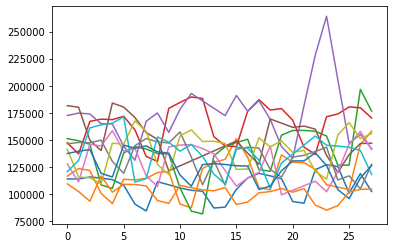

In [64]:
for i in range(m_arr.shape[0]):
    plt.plot(m_arr[i])
plt.show()

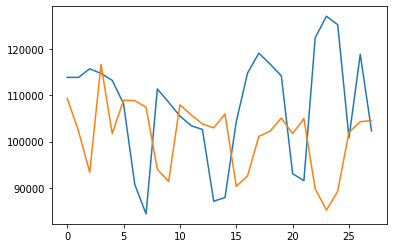

In [67]:
plt.plot(m_arr[0])
plt.plot(m_arr[11])

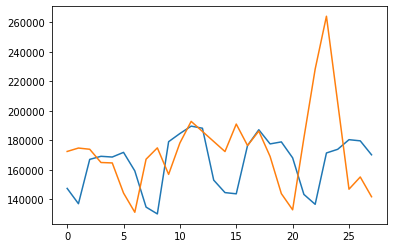

In [68]:
plt.plot(m_arr[3])
plt.plot(m_arr[4])

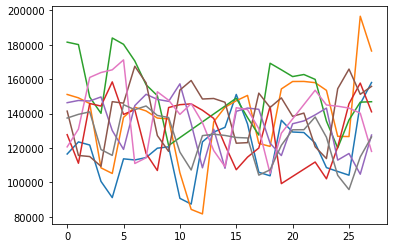

In [69]:
for i in [1, 2, 5, 6, 7, 8, 9, 10]:
    plt.plot(m_arr[i])
plt.show()